In [2]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(twenty_train.data)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

clf = Perceptron().fit(x_train_tfidf, twenty_train.target)

docs_new = ['God is love', 'OpenGL on the GPU is fast']
x_new_counts = count_vect.transform(docs_new)
x_new_tfidf = tfidf_transformer.transform(x_new_counts)

predicted = clf.predict(x_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print("%r => %s" % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


                          precision    recall  f1-score   support

             alt.atheism       0.72      0.71      0.72       319
           comp.graphics       0.79      0.70      0.74       389
 comp.os.ms-windows.misc       0.73      0.77      0.75       394
comp.sys.ibm.pc.hardware       0.70      0.68      0.69       392
   comp.sys.mac.hardware       0.82      0.82      0.82       385
          comp.windows.x       0.85      0.76      0.80       395
            misc.forsale       0.82      0.87      0.85       390
               rec.autos       0.91      0.89      0.90       396
         rec.motorcycles       0.92      0.97      0.94       398
      rec.sport.baseball       0.90      0.91      0.90       397
        rec.sport.hockey       0.86      0.98      0.92       399
               sci.crypt       0.85      0.96      0.90       396
         sci.electronics       0.81      0.62      0.70       393
                 sci.med       0.90      0.87      0.88       396
         

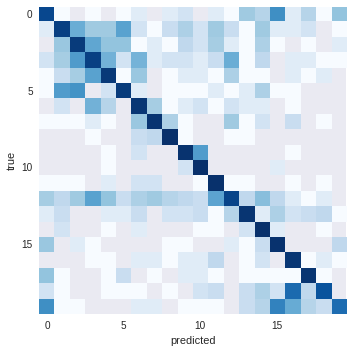

In [4]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
docs_test = twenty_test.data

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42))])
    
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

predicted = text_clf.predict(docs_test)

print(classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

plt.imshow(np.log(confusion_matrix(twenty_test.target, predicted)), cmap = 'Blues', interpolation = 'nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

                          precision    recall  f1-score   support

             alt.atheism       0.74      0.76      0.75       319
           comp.graphics       0.81      0.70      0.75       389
 comp.os.ms-windows.misc       0.75      0.78      0.76       394
comp.sys.ibm.pc.hardware       0.74      0.70      0.72       392
   comp.sys.mac.hardware       0.86      0.82      0.84       385
          comp.windows.x       0.84      0.77      0.80       395
            misc.forsale       0.84      0.91      0.87       390
               rec.autos       0.94      0.90      0.92       396
         rec.motorcycles       0.93      0.97      0.95       398
      rec.sport.baseball       0.89      0.91      0.90       397
        rec.sport.hockey       0.87      0.99      0.92       399
               sci.crypt       0.80      0.96      0.87       396
         sci.electronics       0.87      0.64      0.73       393
                 sci.med       0.88      0.84      0.86       396
         

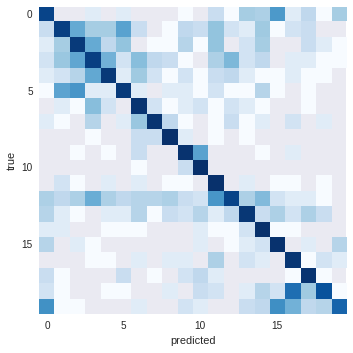

In [7]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
docs_test = twenty_test.data

parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3),}

#text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)),
                     #('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42))])
    
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', n_iter=5, random_state=42)),])

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

predicted = gs_clf.predict(docs_test)

print(classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

plt.imshow(np.log(confusion_matrix(twenty_test.target, predicted)), cmap = 'Blues', interpolation = 'nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

best_parameters, score, _ = max(gs_clf.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    
print(score)

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=None)

twenty_train, twenty_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

clf = Pipeline([
            ("vec", TfidfVectorizer(analyzer='char', lowercase=True)),
            ("svm", LinearSVC(C=1000, max_iter=10000))
        ])

parameters = {"vec__ngram_range": [(1,1),(1,2),(1,3),(1,4)]#,
                  #"vec__min_df": (2, 4, 6, 8),
                  #"vec__max_df": (.05, .1, .15, .2, .25, .3, .35, .4)
                 }

grid_clf = GridSearchCV(clf, parameters, n_jobs=-1)
    
grid_clf.fit(twenty_train, y_train)

predicted = grid_clf.predict(twenty_test)

print(classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

plt.imshow(np.log(confusion_matrix(twenty_test.target, predicted)), cmap = 'Blues', interpolation = 'nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

best_parameters, score, _ = max(gs_clf.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    
print(score)

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=None)

twenty_train, twenty_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

clf = Pipeline([
            ("vec", TfidfVectorizer(analyzer='char', lowercase=True)),
            ("gnb", GaussianNB())
        ])

parameters = {"vec__ngram_range": [(1,1),(1,2),(1,3),(1,4)]#,
                  #"vec__min_df": (2, 4, 6, 8),
                  #"vec__max_df": (.05, .1, .15, .2, .25, .3, .35, .4)
                 }

grid_clf = GridSearchCV(clf, parameters, n_jobs=-1)
    
grid_clf.fit(twenty_train, y_train)

predicted = grid_clf.predict(twenty_test)

print(classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

plt.imshow(np.log(confusion_matrix(twenty_test.target, predicted)), cmap = 'Blues', interpolation = 'nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

best_parameters, score, _ = max(gs_clf.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    
print(score)

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
    ...........................................................................
/usr/lib/python3.4/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    165         sys.exit(msg)
    166     main_globals = sys.modules["__main__"].__dict__
    167     if alter_argv:
    168         sys.argv[0] = mod_spec.origin
    169     return _run_code(code, main_globals, None,
--> 170                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py')
    171 
    172 def run_module(mod_name, init_globals=None,
    173                run_name=None, alter_sys=False):
    174     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.4/runpy.py in _run_code(code=<code object <module> at 0x7fcd587f2300, file "/...3.4/dist-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__pycache__/__main__.cpython-34.pyc', '__doc__': None, '__file__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fcd587f2300, file "/...3.4/dist-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__pycache__/__main__.cpython-34.pyc', '__doc__': None, '__file__': '/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.4/dist-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    587         
    588         If a global instance already exists, this reinitializes and starts it
    589         """
    590         app = cls.instance(**kwargs)
    591         app.initialize(argv)
--> 592         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    593 
    594 #-----------------------------------------------------------------------------
    595 # utility functions, for convenience
    596 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    398         
    399         if self.poller is not None:
    400             self.poller.start()
    401         self.kernel.start()
    402         try:
--> 403             ioloop.IOLoop.instance().start()
    404         except KeyboardInterrupt:
    405             pass
    406 
    407 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    861                 self._events.update(event_pairs)
    862                 while self._events:
    863                     fd, events = self._events.popitem()
    864                     try:
    865                         fd_obj, handler_func = self._handlers[fd]
--> 866                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    867                     except (OSError, IOError) as e:
    868                         if errno_from_exception(e) == errno.EPIPE:
    869                             # Happens when the client closes the connection
    870                             pass

...........................................................................
/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    255         if self.control_stream:
    256             self.control_stream.on_recv(self.dispatch_control, copy=False)
    257 
    258         def make_dispatcher(stream):
    259             def dispatcher(msg):
--> 260                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    261             return dispatcher
    262 
    263         for s in self.shell_streams:
    264             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2015-10-27T12:02:23.067945', 'msg_id': '497D3E53931A4A69AEB9F4DEF86F6987', 'msg_type': 'execute_request', 'session': '0161FC92580D4E67B69F9270566C5A8E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '497D3E53931A4A69AEB9F4DEF86F6987', 'msg_type': 'execute_request', 'parent_header': {}})
    207             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    208         else:
    209             self.log.debug("%s: %s", msg_type, msg)
    210             self.pre_handler_hook()
    211             try:
--> 212                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'0161FC92580D4E67B69F9270566C5A8E']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2015-10-27T12:02:23.067945', 'msg_id': '497D3E53931A4A69AEB9F4DEF86F6987', 'msg_type': 'execute_request', 'session': '0161FC92580D4E67B69F9270566C5A8E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '497D3E53931A4A69AEB9F4DEF86F6987', 'msg_type': 'execute_request', 'parent_header': {}}
    213             except Exception:
    214                 self.log.error("Exception in message handler:", exc_info=True)
    215             finally:
    216                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'0161FC92580D4E67B69F9270566C5A8E'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2015-10-27T12:02:23.067945', 'msg_id': '497D3E53931A4A69AEB9F4DEF86F6987', 'msg_type': 'execute_request', 'session': '0161FC92580D4E67B69F9270566C5A8E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '497D3E53931A4A69AEB9F4DEF86F6987', 'msg_type': 'execute_request', 'parent_header': {}})
    365         if not silent:
    366             self.execution_count += 1
    367             self._publish_execute_input(code, parent, self.execution_count)
    368 
    369         reply_content = self.do_execute(code, silent, store_history,
--> 370                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    371 
    372         # Flush output before sending the reply.
    373         sys.stdout.flush()
    374         sys.stderr.flush()

...........................................................................
/usr/local/lib/python3.4/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)'
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.For object>, <_ast.Expr object>], cell_name='<ipython-input-3-8673450ca57f>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3001 
   3002         try:
   3003             for i, node in enumerate(to_run_exec):
   3004                 mod = ast.Module([node])
   3005                 code = compiler(mod, cell_name, "exec")
-> 3006                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fcd23d41e40, file "<ipython-input-3-8673450ca57f>", line 18>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])

...........................................................................
/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fcd23d41e40, file "<ipython-input-3-8673450ca57f>", line 18>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fcd23d41e40, file "<ipython-input-3-8673450ca57f>", line 18>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'ENGLISH_STOP_WORDS': frozenset(['a', 'about', 'above', 'across', 'after', 'afterwards', ...]), 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', "get_ipython().magic('matplotlib inline')\nimport ...line\nfrom sklearn.grid_search import GridSearchCV", 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)'], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'Out': {}, 'Perceptron': <class 'sklearn.linear_model.perceptron.Perceptron'>, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'ENGLISH_STOP_WORDS': frozenset(['a', 'about', 'above', 'across', 'after', 'afterwards', ...]), 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)', "get_ipython().magic('matplotlib inline')\nimport ...line\nfrom sklearn.grid_search import GridSearchCV", 'dataset = fetch_20newsgroups(shuffle=True, rando..., best_parameters[param_name]))\n    \nprint(score)'], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'Out': {}, 'Perceptron': <class 'sklearn.linear_model.perceptron.Perceptron'>, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
/home/students/schmai01/CS420/<ipython-input-3-8673450ca57f> in <module>()
     13                   #"vec__max_df": (.05, .1, .15, .2, .25, .3, .35, .4)
     14                  }
     15 
     16 grid_clf = GridSearchCV(clf, parameters, n_jobs=-1)
     17     
---> 18 grid_clf.fit(twenty_train, y_train)
     19 
     20 predicted = grid_clf.predict(twenty_test)
     21 
     22 print(classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ... score_func=None, scoring=None,
       verbose=0), X=['From: james.mollica%pics@twwells.com (James Moll...-----------------------------------------------+\n', 'From: Wayne.Orwig@AtlantaGA.NCR.COM  (Wayne Orwi... which gives an\nodd feel, but it still wheelies.\n', 'From: system@garlic.sbs.com (Anthony S. Pellicci...s is a calm .sig! --\n--------------------------\n\n', 'From: linnig@m2000.dseg.ti.com (Mike Linnig)\nSub...- - - - - - - - - - - - - - - - - - - - - - - -\n\n', 'From: b645zaw@utarlg.uta.edu (Stephen Tice)\nSubj...ment \nconcerns. \n\n   |\n-- J --\n   |\n   | stephen\n', 'From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)...             nicho@olympus.demon.co.uk (private)\n', 'From: smb@research.att.com (Steven Bellovin)\nSub...hing, one way or the other.\n\n\n\t\t--Steve Bellovin\n', 'From: ewl@world.std.com (Erich W Lantz)\nSubject:...============================================\n \n\n\n', 'From: baldwa@antietam.adobe.com (Sanjay Baldwa)\n...\n--\nbaldwa@adobe.com  or  ..!decwrl!adobe!baldwa\n', 'From: cramer@optilink.COM (Clayton Cramer)\nSubje...n people to be by mutual consent, or not at all.\n', 'From: nsomerse@uglx.UVic.CA (Neil  Somerset)\nSub...lan\ndmaclach@ra.uvic.ca\nNightFall Software Inc.\n\n', 'From: aa429@freenet.carleton.ca (Terry Ford)\nSub...LPITATIONS is not my fault in any shape or form.\n', 'From: sphughes@sfsuvax1.sfsu.edu (Shaun P. Hughe...r PGP 2.2 Public Key             Convention 1988\n', 'From: keith@orion.ic.cmc.ca (Keith de Solla)\nSub...-----------------------------------------------\n\n', "From: jmilhoan@magnus.acs.ohio-state.edu (JT)\nSu...rs back and don't have any\nspecifics handy).\n\nJT\n", 'From: waldo@cybernet.cse.fau.edu (Todd J. Dicker... know.  Otherwise, back to your own league, son.\n', 'From: fwr8bv@fin.af.MIL (Shash Chatterjee)\nSubje...---------------------------------------------+\n\n\n', 'From: hades@coos.dartmouth.edu (Brian V. Hughes)...S cards. They are not able to use NuBus.\n\n-Hades\n', 'From: hinds@cmgm.stanford.edu (Alexander Hinds)\n... \nby phone at: (415) 497-3719.\n\nAlexander Hinds\n\n', 'From: viking@iastate.edu (Dan Sorenson)\nSubject:...ual people.  And flame them.                   >\n', ...], y=array([ 6,  8, 12, ...,  2, 18,  2]))
    727         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    728             Target relative to X for classification or regression;
    729             None for unsupervised learning.
    730 
    731         """
--> 732         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...score_func=None, scoring=None,
       verbose=0)>
        X = ['From: james.mollica%pics@twwells.com (James Moll...-----------------------------------------------+\n', 'From: Wayne.Orwig@AtlantaGA.NCR.COM  (Wayne Orwi... which gives an\nodd feel, but it still wheelies.\n', 'From: system@garlic.sbs.com (Anthony S. Pellicci...s is a calm .sig! --\n--------------------------\n\n', 'From: linnig@m2000.dseg.ti.com (Mike Linnig)\nSub...- - - - - - - - - - - - - - - - - - - - - - - -\n\n', 'From: b645zaw@utarlg.uta.edu (Stephen Tice)\nSubj...ment \nconcerns. \n\n   |\n-- J --\n   |\n   | stephen\n', 'From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)...             nicho@olympus.demon.co.uk (private)\n', 'From: smb@research.att.com (Steven Bellovin)\nSub...hing, one way or the other.\n\n\n\t\t--Steve Bellovin\n', 'From: ewl@world.std.com (Erich W Lantz)\nSubject:...============================================\n \n\n\n', 'From: baldwa@antietam.adobe.com (Sanjay Baldwa)\n...\n--\nbaldwa@adobe.com  or  ..!decwrl!adobe!baldwa\n', 'From: cramer@optilink.COM (Clayton Cramer)\nSubje...n people to be by mutual consent, or not at all.\n', 'From: nsomerse@uglx.UVic.CA (Neil  Somerset)\nSub...lan\ndmaclach@ra.uvic.ca\nNightFall Software Inc.\n\n', 'From: aa429@freenet.carleton.ca (Terry Ford)\nSub...LPITATIONS is not my fault in any shape or form.\n', 'From: sphughes@sfsuvax1.sfsu.edu (Shaun P. Hughe...r PGP 2.2 Public Key             Convention 1988\n', 'From: keith@orion.ic.cmc.ca (Keith de Solla)\nSub...-----------------------------------------------\n\n', "From: jmilhoan@magnus.acs.ohio-state.edu (JT)\nSu...rs back and don't have any\nspecifics handy).\n\nJT\n", 'From: waldo@cybernet.cse.fau.edu (Todd J. Dicker... know.  Otherwise, back to your own league, son.\n', 'From: fwr8bv@fin.af.MIL (Shash Chatterjee)\nSubje...---------------------------------------------+\n\n\n', 'From: hades@coos.dartmouth.edu (Brian V. Hughes)...S cards. They are not able to use NuBus.\n\n-Hades\n', 'From: hinds@cmgm.stanford.edu (Alexander Hinds)\n... \nby phone at: (415) 497-3719.\n\nAlexander Hinds\n\n', 'From: viking@iastate.edu (Dan Sorenson)\nSubject:...ual people.  And flame them.                   >\n', ...]
        y = array([ 6,  8, 12, ...,  2, 18,  2])
        self.param_grid = {'vec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)]}
    733 
    734 
    735 class RandomizedSearchCV(BaseSearchCV):
    736     """Randomized search on hyper parameters.

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ... score_func=None, scoring=None,
       verbose=0), X=['From: james.mollica%pics@twwells.com (James Moll...-----------------------------------------------+\n', 'From: Wayne.Orwig@AtlantaGA.NCR.COM  (Wayne Orwi... which gives an\nodd feel, but it still wheelies.\n', 'From: system@garlic.sbs.com (Anthony S. Pellicci...s is a calm .sig! --\n--------------------------\n\n', 'From: linnig@m2000.dseg.ti.com (Mike Linnig)\nSub...- - - - - - - - - - - - - - - - - - - - - - - -\n\n', 'From: b645zaw@utarlg.uta.edu (Stephen Tice)\nSubj...ment \nconcerns. \n\n   |\n-- J --\n   |\n   | stephen\n', 'From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)...             nicho@olympus.demon.co.uk (private)\n', 'From: smb@research.att.com (Steven Bellovin)\nSub...hing, one way or the other.\n\n\n\t\t--Steve Bellovin\n', 'From: ewl@world.std.com (Erich W Lantz)\nSubject:...============================================\n \n\n\n', 'From: baldwa@antietam.adobe.com (Sanjay Baldwa)\n...\n--\nbaldwa@adobe.com  or  ..!decwrl!adobe!baldwa\n', 'From: cramer@optilink.COM (Clayton Cramer)\nSubje...n people to be by mutual consent, or not at all.\n', 'From: nsomerse@uglx.UVic.CA (Neil  Somerset)\nSub...lan\ndmaclach@ra.uvic.ca\nNightFall Software Inc.\n\n', 'From: aa429@freenet.carleton.ca (Terry Ford)\nSub...LPITATIONS is not my fault in any shape or form.\n', 'From: sphughes@sfsuvax1.sfsu.edu (Shaun P. Hughe...r PGP 2.2 Public Key             Convention 1988\n', 'From: keith@orion.ic.cmc.ca (Keith de Solla)\nSub...-----------------------------------------------\n\n', "From: jmilhoan@magnus.acs.ohio-state.edu (JT)\nSu...rs back and don't have any\nspecifics handy).\n\nJT\n", 'From: waldo@cybernet.cse.fau.edu (Todd J. Dicker... know.  Otherwise, back to your own league, son.\n', 'From: fwr8bv@fin.af.MIL (Shash Chatterjee)\nSubje...---------------------------------------------+\n\n\n', 'From: hades@coos.dartmouth.edu (Brian V. Hughes)...S cards. They are not able to use NuBus.\n\n-Hades\n', 'From: hinds@cmgm.stanford.edu (Alexander Hinds)\n... \nby phone at: (415) 497-3719.\n\nAlexander Hinds\n\n', 'From: viking@iastate.edu (Dan Sorenson)\nSubject:...ual people.  And flame them.                   >\n', ...], y=array([ 6,  8, 12, ...,  2, 18,  2]), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    500         )(
    501             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    502                                     train, test, self.verbose, parameters,
    503                                     self.fit_params, return_parameters=True,
    504                                     error_score=self.error_score)
--> 505                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    506                 for train, test in cv)
    507 
    508         # Out is a list of triplet: score, estimator, n_test_samples
    509         n_fits = len(out)

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<itertools.islice object>)
    661             if pre_dispatch == "all" or n_jobs == 1:
    662                 # The iterable was consumed all at once by the above for loop.
    663                 # No need to wait for async callbacks to trigger to
    664                 # consumption.
    665                 self._iterating = False
--> 666             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    667             # Make sure that we get a last message telling us we are done
    668             elapsed_time = time.time() - self._start_time
    669             self._print('Done %3i out of %3i | elapsed: %s finished',
    670                         (len(self._output),

    ---------------------------------------------------------------------------
    Sub-process traceback:
    ---------------------------------------------------------------------------
    TypeError                                          Tue Oct 27 12:02:29 2015
PID: 16074                                   Python 3.4.3: /usr/bin/python3
...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py in _fit_and_score(estimator=Pipeline(steps=[('vec', TfidfVectorizer(analyzer...       vocabulary=None)), ('gnb', GaussianNB())]), X=['From: james.mollica%pics@twwells.com (James Moll...-----------------------------------------------+\n', 'From: Wayne.Orwig@AtlantaGA.NCR.COM  (Wayne Orwi... which gives an\nodd feel, but it still wheelies.\n', 'From: system@garlic.sbs.com (Anthony S. Pellicci...s is a calm .sig! --\n--------------------------\n\n', 'From: linnig@m2000.dseg.ti.com (Mike Linnig)\nSub...- - - - - - - - - - - - - - - - - - - - - - - -\n\n', 'From: b645zaw@utarlg.uta.edu (Stephen Tice)\nSubj...ment \nconcerns. \n\n   |\n-- J --\n   |\n   | stephen\n', 'From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)...             nicho@olympus.demon.co.uk (private)\n', 'From: smb@research.att.com (Steven Bellovin)\nSub...hing, one way or the other.\n\n\n\t\t--Steve Bellovin\n', 'From: ewl@world.std.com (Erich W Lantz)\nSubject:...============================================\n \n\n\n', 'From: baldwa@antietam.adobe.com (Sanjay Baldwa)\n...\n--\nbaldwa@adobe.com  or  ..!decwrl!adobe!baldwa\n', 'From: cramer@optilink.COM (Clayton Cramer)\nSubje...n people to be by mutual consent, or not at all.\n', 'From: nsomerse@uglx.UVic.CA (Neil  Somerset)\nSub...lan\ndmaclach@ra.uvic.ca\nNightFall Software Inc.\n\n', 'From: aa429@freenet.carleton.ca (Terry Ford)\nSub...LPITATIONS is not my fault in any shape or form.\n', 'From: sphughes@sfsuvax1.sfsu.edu (Shaun P. Hughe...r PGP 2.2 Public Key             Convention 1988\n', 'From: keith@orion.ic.cmc.ca (Keith de Solla)\nSub...-----------------------------------------------\n\n', "From: jmilhoan@magnus.acs.ohio-state.edu (JT)\nSu...rs back and don't have any\nspecifics handy).\n\nJT\n", 'From: waldo@cybernet.cse.fau.edu (Todd J. Dicker... know.  Otherwise, back to your own league, son.\n', 'From: fwr8bv@fin.af.MIL (Shash Chatterjee)\nSubje...---------------------------------------------+\n\n\n', 'From: hades@coos.dartmouth.edu (Brian V. Hughes)...S cards. They are not able to use NuBus.\n\n-Hades\n', 'From: hinds@cmgm.stanford.edu (Alexander Hinds)\n... \nby phone at: (415) 497-3719.\n\nAlexander Hinds\n\n', 'From: viking@iastate.edu (Dan Sorenson)\nSubject:...ual people.  And flame them.                   >\n', ...], y=array([ 6,  8, 12, ...,  2, 18,  2]), scorer=<function _passthrough_scorer>, train=array([2616, 2648, 2679, ..., 8482, 8483, 8484]), test=array([   0,    1,    2, ..., 3030, 3034, 3041]), verbose=0, parameters={'vec__ngram_range': (1, 1)}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1454 
   1455     try:
   1456         if y_train is None:
   1457             estimator.fit(X_train, **fit_params)
   1458         else:
-> 1459             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(steps=[('...      vocabulary=None)), ('gnb', GaussianNB())])>
        X_train = ['From: davisonj@en.ecn.purdue.edu (John M Davison...m.com.\n\n-- \nJohn Davison\ndavisonj@ecn.purdue.edu\n', 'From: mmm@cup.portal.com (Mark Robert Thorson)\nS... would be mailed within 24 hours).\n\nMark Thorson\n', 'From: 02106@ravel.udel.edu (Samuel Ross)\nSubject...f Electrical Engineering, University of Delaware\n', 'From: betz@gozer.idbsu.edu (Andrew Betz)\nSubject...tunium, terrorist, cia, mi5, mi6, kgb, deuterium\n', 'From: 02106@ravel.udel.edu (Samuel Ross)\nSubject...06@chopin.udel.edu\n\n\n\nSam\n02106@chopin.udel.edu\n\n', 'From: arc@cco.caltech.edu (Aaron Ray Clements)\nS... in our Constitution.\n\naaron\narc@cco.caltech.edu\n', 'From: whughes@lonestar.utsa.edu (William W. Hugh... care if you blame the University or the State.]\n', "From: cobb@alexia.lis.uiuc.edu (Mike Cobb)\nSubje...ts we'll still have 310 billion dollar deficits.\n", 'From: jon@atlas.MITRE.org (J. E. Shum)\nSubject: ...re.org)     | clintonpz@aol.com (America Online)\n', 'From: mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blun... stuff to keep there women happy?\n\n>Beth\nMark B.\n', 'From: dtodd@titan.ucs.umass.edu (David M. Todd)\n....Todd@Psych.UMass.EDU> ____  Fax: 413/545-0996|\n\n', 'From: ihno@generics.ka.sub.org (Ihno Krumreich)\n... ihno@generics.ka.sub.org U   U NN  N   I    X X\n', 'From: zmed16@trc.amoco.com (Michael)\nSubject: FO...pond to:\n\n\tzmed16@trc.amoco.com\n\nThanks,\n\nMike\n \n', 'From: dwilson@csugrad.cs.vt.edu (David Wilson)\nS...               BEST OFFER SO FAR $SOLD FOR $475\n\n', 'From: etjet@levels.unisa.edu.au\nSubject: Aussie ...levels.unisa.edu.au\n\n\nThanks,\n\nJohn Tsimbinos \n\n\n', 'Subject: Re: Ed must be a Daemon Child!!\nFrom: R...ollowup might expire before I see the Net again.\n', 'From: sanjay@kin.lap.upenn.edu (Sanjay Sinha)\nSu...   I would give my right arm to be ambidextrous!\n', 'From: dbl@visual.com (David B. Lewis)\nSubject: c...dbl@visual.com\tevening: david%craft@uunet.uu.net\n', 'From: prunet@zephir.inria.fr (Vincent Prunet)\nSu...nria.fr, (33) 93 65 78 42, Fax:(33) 93 65 77 66\n\n', 'From: shapiro@oucsace.cs.ohiou.edu (Brian Shapir...oucsace.cs.ohiou.edu or SHAPIROB@OUACCVMA.BITNET\n', ...]
        y_train = array([ 6,  6,  6, ...,  2, 18,  2])
        fit_params = {}
   1460 
   1461     except Exception as e:
   1462         if error_score == 'raise':
   1463             raise

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/pipeline.py in fit(self=Pipeline(steps=[('vec', TfidfVectorizer(analyzer...       vocabulary=None)), ('gnb', GaussianNB())]), X=['From: davisonj@en.ecn.purdue.edu (John M Davison...m.com.\n\n-- \nJohn Davison\ndavisonj@ecn.purdue.edu\n', 'From: mmm@cup.portal.com (Mark Robert Thorson)\nS... would be mailed within 24 hours).\n\nMark Thorson\n', 'From: 02106@ravel.udel.edu (Samuel Ross)\nSubject...f Electrical Engineering, University of Delaware\n', 'From: betz@gozer.idbsu.edu (Andrew Betz)\nSubject...tunium, terrorist, cia, mi5, mi6, kgb, deuterium\n', 'From: 02106@ravel.udel.edu (Samuel Ross)\nSubject...06@chopin.udel.edu\n\n\n\nSam\n02106@chopin.udel.edu\n\n', 'From: arc@cco.caltech.edu (Aaron Ray Clements)\nS... in our Constitution.\n\naaron\narc@cco.caltech.edu\n', 'From: whughes@lonestar.utsa.edu (William W. Hugh... care if you blame the University or the State.]\n', "From: cobb@alexia.lis.uiuc.edu (Mike Cobb)\nSubje...ts we'll still have 310 billion dollar deficits.\n", 'From: jon@atlas.MITRE.org (J. E. Shum)\nSubject: ...re.org)     | clintonpz@aol.com (America Online)\n', 'From: mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blun... stuff to keep there women happy?\n\n>Beth\nMark B.\n', 'From: dtodd@titan.ucs.umass.edu (David M. Todd)\n....Todd@Psych.UMass.EDU> ____  Fax: 413/545-0996|\n\n', 'From: ihno@generics.ka.sub.org (Ihno Krumreich)\n... ihno@generics.ka.sub.org U   U NN  N   I    X X\n', 'From: zmed16@trc.amoco.com (Michael)\nSubject: FO...pond to:\n\n\tzmed16@trc.amoco.com\n\nThanks,\n\nMike\n \n', 'From: dwilson@csugrad.cs.vt.edu (David Wilson)\nS...               BEST OFFER SO FAR $SOLD FOR $475\n\n', 'From: etjet@levels.unisa.edu.au\nSubject: Aussie ...levels.unisa.edu.au\n\n\nThanks,\n\nJohn Tsimbinos \n\n\n', 'Subject: Re: Ed must be a Daemon Child!!\nFrom: R...ollowup might expire before I see the Net again.\n', 'From: sanjay@kin.lap.upenn.edu (Sanjay Sinha)\nSu...   I would give my right arm to be ambidextrous!\n', 'From: dbl@visual.com (David B. Lewis)\nSubject: c...dbl@visual.com\tevening: david%craft@uunet.uu.net\n', 'From: prunet@zephir.inria.fr (Vincent Prunet)\nSu...nria.fr, (33) 93 65 78 42, Fax:(33) 93 65 77 66\n\n', 'From: shapiro@oucsace.cs.ohiou.edu (Brian Shapir...oucsace.cs.ohiou.edu or SHAPIROB@OUACCVMA.BITNET\n', ...], y=array([ 6,  6,  6, ...,  2, 18,  2]), **fit_params={})
    136         y : iterable, default=None
    137             Training targets. Must fulfill label requirements for all steps of
    138             the pipeline.
    139         """
    140         Xt, fit_params = self._pre_transform(X, y, **fit_params)
--> 141         self.steps[-1][-1].fit(Xt, y, **fit_params)
        self.steps.fit = undefined
        Xt = <5649x100 sparse matrix of type '<class 'numpy.f... stored elements in Compressed Sparse Row format>
        y = array([ 6,  6,  6, ...,  2, 18,  2])
        fit_params = {}
    142         return self
    143 
    144     def fit_transform(self, X, y=None, **fit_params):
    145         """Fit all the transforms one after the other and transform the

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/naive_bayes.py in fit(self=GaussianNB(), X=<5649x100 sparse matrix of type '<class 'numpy.f... stored elements in Compressed Sparse Row format>, y=array([ 6,  6,  6, ...,  2, 18,  2]))
    159         Returns
    160         -------
    161         self : object
    162             Returns self.
    163         """
--> 164         X, y = check_X_y(X, y)
        X = <5649x100 sparse matrix of type '<class 'numpy.f... stored elements in Compressed Sparse Row format>
        y = array([ 6,  6,  6, ...,  2, 18,  2])
    165         return self._partial_fit(X, y, np.unique(y), _refit=True)
    166 
    167     @staticmethod
    168     def _update_mean_variance(n_past, mu, var, X):

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py in check_X_y(X=<5649x100 sparse matrix of type '<class 'numpy.f... stored elements in Compressed Sparse Row format>, y=array([ 6,  6,  6, ...,  2, 18,  2]), accept_sparse=None, dtype='numeric', order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=False, ensure_min_samples=1, ensure_min_features=1, y_numeric=False)
    439     X_converted : object
    440         The converted and validated X.
    441     """
    442     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    443                     ensure_2d, allow_nd, ensure_min_samples,
--> 444                     ensure_min_features)
        ensure_min_features = 1
    445     if multi_output:
    446         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    447                         dtype=None)
    448     else:

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py in check_array(array=<5649x100 sparse matrix of type '<class 'numpy.f... stored elements in Compressed Sparse Row format>, accept_sparse=None, dtype=None, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1)
    329 
    330     if sp.issparse(array):
    331         if dtype_numeric:
    332             dtype = None
    333         array = _ensure_sparse_format(array, accept_sparse, dtype, order,
--> 334                                       copy, force_all_finite)
        copy = False
        force_all_finite = True
    335     else:
    336         if ensure_2d:
    337             array = np.atleast_2d(array)
    338         if dtype_numeric:

...........................................................................
/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py in _ensure_sparse_format(spmatrix=<5649x100 sparse matrix of type '<class 'numpy.f... stored elements in Compressed Sparse Row format>, accept_sparse=None, dtype=None, order=None, copy=False, force_all_finite=True)
    234     -------
    235     spmatrix_converted : scipy sparse matrix.
    236         Matrix that is ensured to have an allowed type.
    237     """
    238     if accept_sparse is None:
--> 239         raise TypeError('A sparse matrix was passed, but dense '
    240                         'data is required. Use X.toarray() to '
    241                         'convert to a dense numpy array.')
    242     sparse_type = spmatrix.format
    243     if dtype is None:

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
___________________________________________________________________________